In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
# Pascals Triangle

def nChooseK(n,k):
  num = math.factorial(n)
  den = math.factorial(k)*math.factorial(n-k)
  return num/den


[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 2 1 0 0]
 [1 3 3 1 0]
 [1 4 6 4 1]]


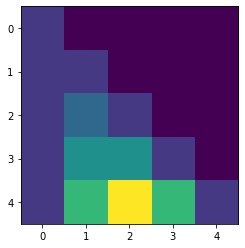

In [14]:
pSize = 5

PT = np.zeros((pSize,pSize),dtype=('int'))
for n in range(pSize):
  for k in range(n+1):
    PT[n,k] = nChooseK(n,k)

print(PT)
plt.imshow(PT)
plt.show()

In [23]:
for i in range(pSize):
  tmp = PT[i,:]
  tmp = tmp[tmp!= 0]
  print(' '*(pSize-i) + np.array2string(tmp)[1:-1])

     1
    1 1
   1 2 1
  1 3 3 1
 1 4 6 4 1


In [25]:
# Euler's identity

m = 4.3
p = np.pi/4

# Euler notatiom

euler = m*np.exp(1j*p)

#rect notation

rect = m*(np.cos(p) + 1j*np.sin(p))

print(euler)
print(rect)

(3.0405591591021546+3.040559159102154j)
(3.0405591591021546+3.040559159102154j)


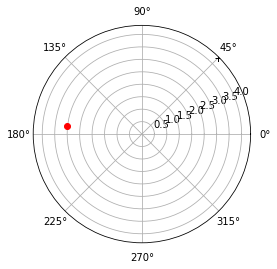

In [32]:
# wron approach
theta = np.angle(euler)
radius = np.abs(euler)

x = np.real(euler)
y = np.imag(euler)
plt.polar(p,m,'k+')
plt.plot(x,y,'ro')

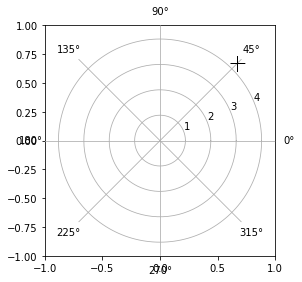

In [48]:
fig = plt.figure()
ax_cart = fig.add_axes([.1,.1,.8,.8])
ax_polr = fig.add_axes([.1,.1,.8,.8],polar = True,frameon = False)

r = ax_polr.get_rmax()

ax_cart.set_xlim([-r,r])
ax_cart.set_ylim([-r,r])
ax_cart.set_aspect(1/ax_cart.get_data_ratio())

ax_polr.plot(p,m,'k+',markersize = 15)
ax_cart.plot(x,y,'ro',markersize = 15)

ax_cart.set_xlim([-r,r])
ax_cart.set_ylim([-r,r])
ax_cart.set_aspect(1/ax_cart.get_data_ratio())

plt.show()

In [53]:
# Parametrized Gaussian

x = np.linspace(-10,10,1000)

def makeGauss(amp,sigma,tau = 0):
  g = amp/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-tau)**2/(2*sigma**2))
  return g

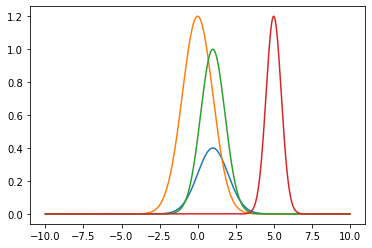

In [56]:
plt.plot(x,makeGauss(1,1,1))
plt.plot(x,makeGauss(3,1))
plt.plot(x,makeGauss(2,.8,1))
plt.plot(x,makeGauss(1.5,.5,5))

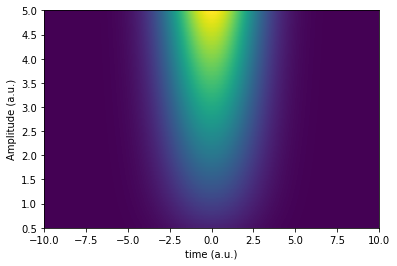

In [62]:
amps = np.linspace(.5,5,50)
G = np.zeros((len(amps),len(x)))
for a in range(len(amps)):
  G[a,:] = makeGauss(amps[a],2)

plt.imshow(G, aspect = 'auto',extent = [x[0],x[-1],amps[0],amps[-1]],origin = 'lower')
plt.xlabel('time (a.u.)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Varying a parameter')
plt.show()

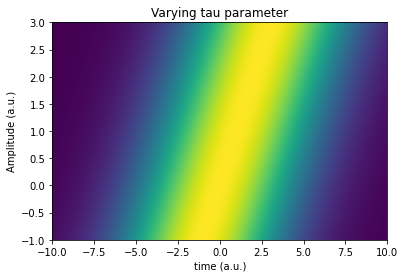

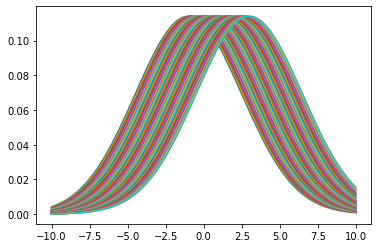

In [68]:
taus = np.linspace(-1,3,50)
G = np.zeros((len(taus),len(x)))
for a in range(len(taus)):
  G[a,:] = makeGauss(1,3.5,taus[a])

plt.imshow(G, aspect = 'auto',extent = [x[0],x[-1],taus[0],taus[-1]],origin = 'lower')
plt.xlabel('time (a.u.)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Varying tau parameter')
plt.show()

plt.plot(x,G.T)
plt.show()

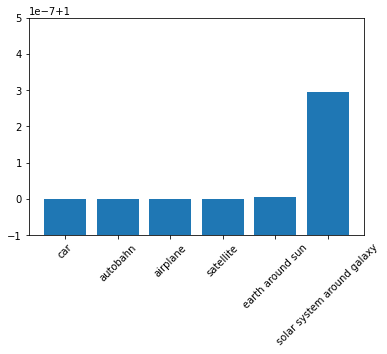

In [80]:
# Time Dilation

c = 299792458
timedil = lambda v: 1/np.sqrt(1-(v**2/c**2))

kph = np.zeros(6)
kph[0] = 100
kph[1] = 200
kph[2] = 900
kph[3] = 11300
kph[4] = 107991
kph[5] = 828000

labels = ['car','autobahn','airplane', 'satellite', 'earth around sun', 'solar system around galaxy']
td = np.zeros(6)
for i in range(len(kph)):
  v = kph[i]*1000/3600
  td[i] = timedil(v)

plt.bar(range(len(td)),td)
plt.xticks(range(len(td)),labels = labels,rotation=45)
plt.ylim([.9999999,1.0000005])
plt.show()

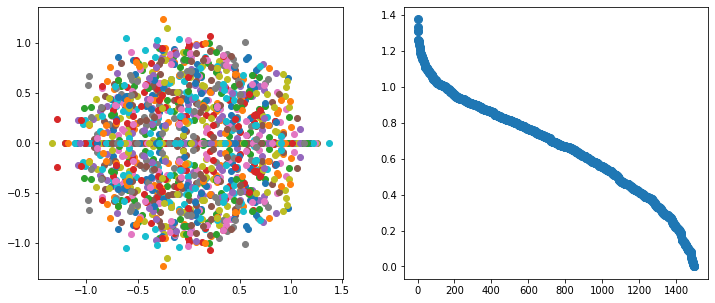

In [87]:
# Eigenvalues on complex circle

fig, ax = plt.subplots(1,2,figsize=(12,5))

n = 15
mags = []
for i in range(100):
  # Create random numbers matrix

  A = np.random.randn(n,n)/np.sqrt(n)
  L = np.linalg.eig(A)[0]
  mags = np.concatenate((mags,np.abs(L)))
  ax[0].plot(np.real(L),np.imag(L),'o')

ax[1].plot(np.sort(mags)[::-1],'o',markersize = 8)  